# Prep

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
from tensorflow.keras.utils import image_dataset_from_directory


2023-05-08 17:35:19.975131: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
#locate data
! pwd
! ls ../data/

/home/louis/code/JammyNinja/Sandbox/chess_pieces_first/notebooks
chess_pieces_images


## Load data

In [3]:
#gotta load the data in data/chess_pieces_images
path_to_dataset = os.path.join("..","data","chess_pieces_images")
IMG_SIZE = 200 #?
my_seed = 69 
val_split = 0.2

In [4]:
class_names = ["bishop", "knight", "pawn", "queen", "rook"]

In [5]:
X_train = image_dataset_from_directory(
        path_to_dataset,
        #label_mode="int",
        labels='inferred',
        class_names = class_names,
        color_mode="rgb",
        seed=my_seed,
        subset="training",
        validation_split=val_split,
        image_size=(IMG_SIZE, IMG_SIZE),
        batch_size=16,
        shuffle=True
        )

X_test = image_dataset_from_directory(
        path_to_dataset,
        #label_mode="int",
        labels='inferred',
        class_names = class_names,
        color_mode="rgb",
        seed=my_seed,
        subset="validation",
        validation_split=val_split,
        image_size=(IMG_SIZE, IMG_SIZE),
        batch_size=16,
        shuffle=True
        )

Found 651 files belonging to 5 classes.
Using 521 files for training.
Found 651 files belonging to 5 classes.
Using 130 files for validation.


In [6]:
X_train.class_names

['bishop', 'knight', 'pawn', 'queen', 'rook']

## Inspect some images

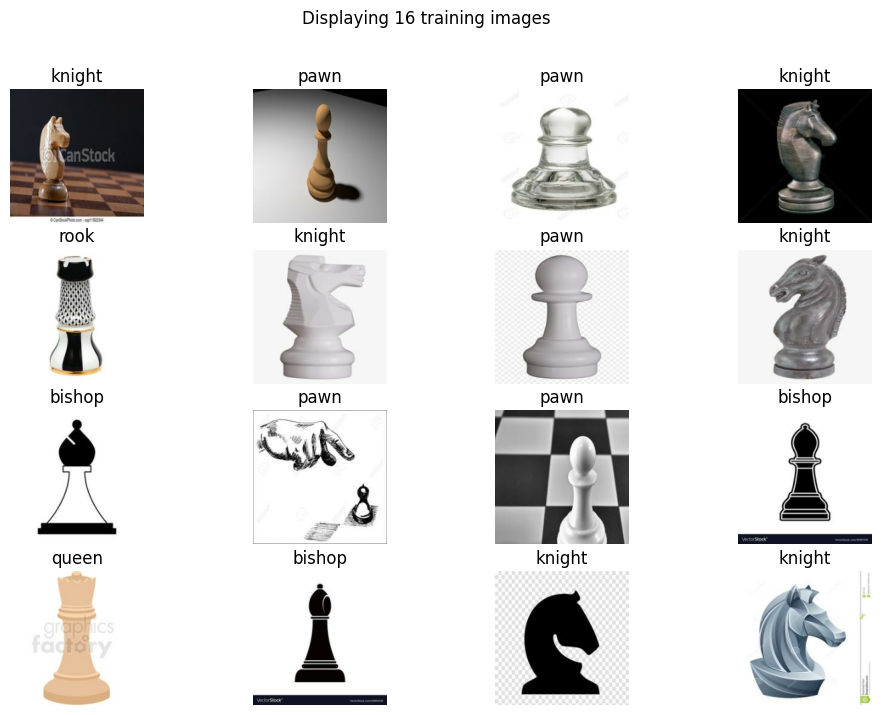

In [6]:
#Maybe try to force a spread of classes

def show_batch_images(image_batch_in, N=8, num_cols=4):
    
    #see how many batches we will need
    batch_size = 0
    batches = 1
    for batch, labels in image_batch_in:
        batch_size = batch.shape[0]
    if N > batch_size:
        batches = ceil(N/batch_size)
    
    #collect images from batch
    images_to_show, labels_to_show = [],[]
    for image_batch, label_batch in image_batch_in.take(batches).as_numpy_iterator():
        #print(image.shape)
        for image, label in zip(image_batch, label_batch):
            if len(labels_to_show) < N:
                images_to_show.append(image)
                labels_to_show.append(label)
    
    num_cols = 4
    num_rows = ceil(N/num_cols)
    
    #now display them     
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(num_cols*3,num_rows*2))
    fig.suptitle(f"Displaying {N} training images")
    
    for i, image in enumerate(labels_to_show):
        x = i % num_cols
        y = i // num_cols
        axs[y,x].axis('off')
        axs[y,x].imshow(images_to_show[i]/255)
        axs[y,x].set_title(f"{class_names[labels_to_show[i] ]}")
    
show_batch_images(X_train, N=16)

<AxesSubplot:title={'center':'Test set class distribution'}, ylabel='Count'>

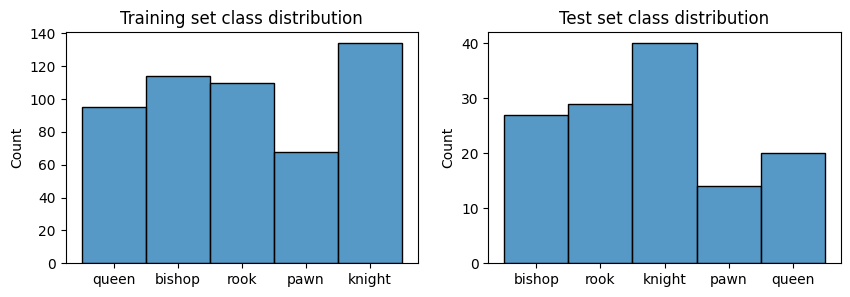

In [7]:
#check how many of each image there is - are classes evenly represented?
train_labels = []
train_images = []
#count 'em up
for image_batch, label_batch in X_train.as_numpy_iterator():
    for label in label_batch:
        train_labels.append(label)
    for image in image_batch:
        train_images.append(image)

train_labels_words = [X_train.class_names[x] for x in train_labels]


#check how many of each image there is - are classes evenly represented?
test_labels = []
test_images = []
#count 'em up
for image_batch, label_batch in X_test.as_numpy_iterator():
    #could zip these too
    for label in label_batch:
        test_labels.append(label)
    for image in image_batch:
        test_images.append(image)

test_labels_words = [X_test.class_names[x] for x in test_labels]

fig, axs = plt.subplots(1,2, figsize=(10,3))

axs[0].set_title("Training set class distribution")
sns.histplot(train_labels_words, ax=axs[0])

axs[1].set_title("Test set class distribution")
sns.histplot(test_labels_words,  ax=axs[1])

In [11]:
len(test_labels)
#test_labels;

130

In [12]:
test_labels2 = []
for image_batch2, label_batch2 in X_test.as_numpy_iterator():
    for label in label_batch2:
        test_labels2.append(label)


In [13]:
test_labels == test_labels2

False

In [18]:
#Shape of images, by design
in_shape = train_images[0].shape
print(f"{IMG_SIZE = }\n{in_shape = }")

IMG_SIZE = 200
in_shape = (200, 200, 3)


### Baseline calcs

In [20]:
total_training_images = len(train_labels_words)

num_bishops = train_labels_words.count("bishop")
num_knights = train_labels_words.count("knight")
num_rooks = train_labels_words.count("rook")
num_pawns = train_labels_words.count("pawn")
num_queens = train_labels_words.count("queen")

baseline_dict = {
    "knight" : num_knights  / total_training_images,
    "bishop" : num_bishops  / total_training_images,
    "queen"  : num_queens   / total_training_images,
    "rook"   : num_rooks    / total_training_images,
    "pawn"   : num_pawns    / total_training_images
}

baseline_dict["mean"] = sum(baseline_dict.values()) / len(baseline_dict)

baseline_dict

{'knight': 0.2571976967370441,
 'bishop': 0.21880998080614203,
 'queen': 0.18234165067178504,
 'rook': 0.21113243761996162,
 'pawn': 0.13051823416506717,
 'mean': 0.2}

In [ ]:
#BETTER WAY?!

# image, label = next(iter(X_train))
# _ = plt.imshow(image)
# _ = plt.title(get_label_name(label))

# New heading